In [2]:
import sys
assert sys.version_info >= (3, 5)
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings('ignore') # Para evitar los molestos avisos.
%matplotlib inline
from sklearn.preprocessing import StandardScaler

In [97]:
# Estandarizador (transforma las variables en z-scores)
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import utils as ut

In [4]:
DATA_PATH = "../data/union/End"
def load_data_prep(data_path=DATA_PATH):
    csv_path = os.path.join(data_path, "dataset_final.csv")
    return pd.read_csv(csv_path)

In [19]:
df = load_data_prep()

In [20]:
df.shape

(75, 437)

In [139]:
df1 = df[ut.filtro()]

In [22]:
df1.head()

,cod,ccbd_diameter,ccbd_iso,ccbd_mean_length,ccbd_number_of_tracts,ccbd_qa,ccbd_radius_of_end_region_1,ccbd_radius_of_end_region_2,ccbd_volume,ecpl_diameter,...,fatr_volume,ufsr_diameter,ufsr_iso,ufsr_mean_length,ufsr_number_of_tracts,ufsr_qa,ufsr_radius_of_end_region_1,ufsr_radius_of_end_region_2,ufsr_volume,label
0,sub-10171,27.3579,0.446077,111.237,36905.0,0.215172,19.1653,19.2532,65389.1,7.004120,...,19514.0,17.1792,0.503620,61.0658,4950.0,0.160238,8.82430,9.62320,14154.40,1
1,sub-10189,25.3084,0.188728,115.111,39509.0,0.089672,20.7926,24.1406,57907.5,8.893479,...,14557.9,16.8371,0.231146,52.8185,3627.0,0.071355,9.02383,10.12790,11760.10,1
2,sub-10206,26.0740,0.212524,109.945,39403.0,0.120823,16.3859,15.3304,58705.6,8.893479,...,18435.8,13.3607,0.257717,44.0673,2046.0,0.111454,8.95602,8.21973,6178.25,1
3,sub-10217,30.9647,0.464436,109.997,48988.0,0.239632,18.3277,18.7348,82833.0,10.907700,...,15469.6,15.6964,0.512934,55.8102,4247.0,0.156681,8.68760,8.48388,10799.40,1
4,sub-10225,24.6510,0.569153,131.729,44224.0,0.301554,26.1355,20.2082,62869.5,8.893479,...,13896.9,12.8347,0.683337,36.0666,742.0,0.210445,11.83780,12.60370,4666.25,1


In [23]:
fasc = [ 'cfpr_', 'ccbd_', 'ecpl_', 'ifol_', 'sl2l_', 'tral_', 'ufsl_', 'ufsr_' ]
lab = ['radius_of_end_region_1', 'radius_of_end_region_2', 'qa', 'iso']
borrar = []
for i in fasc:
    df1[i+'ip1_dif'] = df1[i+lab[2]]/(df1[i+lab[0]]+df1[i+lab[1]])
    df1[i+'ip2_norm'] = df1[i+lab[3]]/(df1[i+lab[2]])
for i in fasc:
    for j in lab:
        borrar.append(i+j)


In [25]:
df1.drop(borrar, axis=1, inplace=True)

In [26]:
df1.head()

,cod,ccbd_diameter,ccbd_mean_length,ccbd_number_of_tracts,ccbd_volume,ecpl_diameter,ecpl_mean_length,ecpl_number_of_tracts,ecpl_volume,ifol_diameter,...,ifol_ip1_dif,ifol_ip2_norm,sl2l_ip1_dif,sl2l_ip2_norm,tral_ip1_dif,tral_ip2_norm,ufsl_ip1_dif,ufsl_ip2_norm,ufsr_ip1_dif,ufsr_ip2_norm
0,sub-10171,27.3579,111.237,36905.0,65389.1,7.004120,111.475000,1048.000000,4295.100000,14.21160,...,0.007929,1.967688,0.006490,2.574465,0.006649,2.486354,0.009425,2.637159,0.008686,3.142950
1,sub-10189,25.3084,115.111,39509.0,57907.5,8.893479,100.580235,2936.541667,6774.582292,14.68170,...,0.003705,2.322339,0.002774,2.668472,0.003548,2.513058,0.003527,4.245304,0.003726,3.239371
2,sub-10206,26.0740,109.945,39403.0,58705.6,8.893479,100.580235,2936.541667,6774.582292,7.88520,...,0.009230,2.040639,0.004730,2.642847,0.004208,2.376092,0.008046,2.881791,0.006489,2.312317
3,sub-10217,30.9647,109.997,48988.0,82833.0,10.907700,95.805300,4655.000000,8952.530000,15.93850,...,0.007957,2.028316,0.007480,2.615611,0.008466,2.580978,0.006749,3.922734,0.009124,3.273747
4,sub-10225,24.6510,131.729,44224.0,62869.5,8.893479,100.580235,2936.541667,6774.582292,8.30575,...,0.021328,1.964517,0.007364,2.633665,0.008536,2.677147,0.011457,2.678544,0.008610,3.247105


In [83]:
# data1 = df1[df1['label'] == 0]  -- ultimo modificado
# data1 = data1.drop(['cod', 'label'], axis=1).groupby(by='afsl_qa').mean()
# The correlation between all pairs of variables is easily computed with Pandas.
data1 = df1
corr_matrix =  data1.drop(['cod', 'label'], axis=1).corr()
print(corr_matrix.shape)
corr_matrix.iloc[:10, :10]

(56, 56)


,ccbd_diameter,ccbd_mean_length,ccbd_number_of_tracts,ccbd_volume,ecpl_diameter,ecpl_mean_length,ecpl_number_of_tracts,ecpl_volume,ifol_diameter,ifol_mean_length
ccbd_diameter,1.000000,0.474585,0.819657,0.962801,0.227389,0.079310,0.250868,0.196755,0.405439,-0.018067
ccbd_mean_length,0.474585,1.000000,0.632662,0.661074,-0.200403,0.049768,-0.150635,-0.189423,0.382139,0.413897
ccbd_number_of_tracts,0.819657,0.632662,1.000000,0.845406,0.209137,0.259266,0.236256,0.228501,0.467158,0.219849
ccbd_volume,0.962801,0.661074,0.845406,1.000000,0.118748,0.097716,0.156397,0.098123,0.417439,0.103393
ecpl_diameter,0.227389,-0.200403,0.209137,0.118748,1.000000,-0.067787,0.914063,0.962443,0.184842,-0.126333
ecpl_mean_length,0.079310,0.049768,0.259266,0.097716,-0.067787,1.000000,-0.041389,0.074944,0.058699,0.198920
ecpl_number_of_tracts,0.250868,-0.150635,0.236256,0.156397,0.914063,-0.041389,1.000000,0.904597,0.130580,-0.086865
ecpl_volume,0.196755,-0.189423,0.228501,0.098123,0.962443,0.074944,0.904597,1.000000,0.190889,-0.064114
ifol_diameter,0.405439,0.382139,0.467158,0.417439,0.184842,0.058699,0.130580,0.190889,1.000000,0.361399
ifol_mean_length,-0.018067,0.413897,0.219849,0.103393,-0.126333,0.198920,-0.086865,-0.064114,0.361399,1.000000


In [84]:
correlation_mat = corr_matrix
corr_pairs = correlation_mat.unstack()
sorted_pairs = corr_pairs.sort_values(kind="quicksort")
sorted_pairs

fatr_diameter          ccbd_ip2_norm           -0.633639
ccbd_ip2_norm          fatr_diameter           -0.633639
tral_diameter          tral_ip1_dif            -0.614032
tral_ip1_dif           tral_diameter           -0.614032
ccbd_mean_length       ccbd_ip2_norm           -0.605181
                                                  ...   
fatr_number_of_tracts  fatr_number_of_tracts    1.000000
fatr_mean_length       fatr_mean_length         1.000000
fatr_iso               fatr_iso                 1.000000
cfpr_ip1_dif           cfpr_ip1_dif             1.000000
ufsr_ip2_norm          ufsr_ip2_norm            1.000000
Length: 3136, dtype: float64

In [85]:
strong_pairs = sorted_pairs[(abs(sorted_pairs) > 0.7)]

In [86]:
strong_pairs.shape

(144,)

In [87]:
print(strong_pairs.groupby(level=0).filter(lambda x: len(x)>=2).sort_values(ascending=True)[:10])

ufsr_volume                  ufsr_mean_length               0.706954
ufsr_mean_length             ufsr_volume                    0.706954
ufsr_number_of_tracts        ufsl_number_of_tracts          0.709118
ufsl_number_of_tracts        ufsr_number_of_tracts          0.709118
sl2l_ip1_dif                 ccbd_ip1_dif                   0.719703
ccbd_ip1_dif                 sl2l_ip1_dif                   0.719703
ufsl_mean_length             ufsr_mean_length               0.719963
ufsr_mean_length             ufsl_mean_length               0.719963
fatr_radius_of_end_region_2  fatr_radius_of_end_region_1    0.721572
fatr_radius_of_end_region_1  fatr_radius_of_end_region_2    0.721572
dtype: float64


In [39]:
#strong_pairs.index.names = ['feature1', 'feature2']

In [59]:
#strong_pairs.index = strong_pairs.index.map(lambda x: ': '.join(x))

In [65]:
#strong_pairs = strong_pairs[strong_pairs.index.get_level_values(0) != strong_pairs.index.get_level_values(1)]

In [88]:
strong_pairs.index.get_level_values(0).unique().shape

(56,)

In [93]:
sel_corr = strong_pairs.index.get_level_values(0).unique().values

In [95]:
sel_corr.shape

(56,)

In [90]:
strong_pairs.groupby(level=0).filter(lambda x: len(x)>=2).sort_values(ascending=True)[:10].index

MultiIndex([(                'ufsr_volume',            'ufsr_mean_length'),
            (           'ufsr_mean_length',                 'ufsr_volume'),
            (      'ufsr_number_of_tracts',       'ufsl_number_of_tracts'),
            (      'ufsl_number_of_tracts',       'ufsr_number_of_tracts'),
            (               'sl2l_ip1_dif',                'ccbd_ip1_dif'),
            (               'ccbd_ip1_dif',                'sl2l_ip1_dif'),
            (           'ufsl_mean_length',            'ufsr_mean_length'),
            (           'ufsr_mean_length',            'ufsl_mean_length'),
            ('fatr_radius_of_end_region_2', 'fatr_radius_of_end_region_1'),
            ('fatr_radius_of_end_region_1', 'fatr_radius_of_end_region_2')],
           )

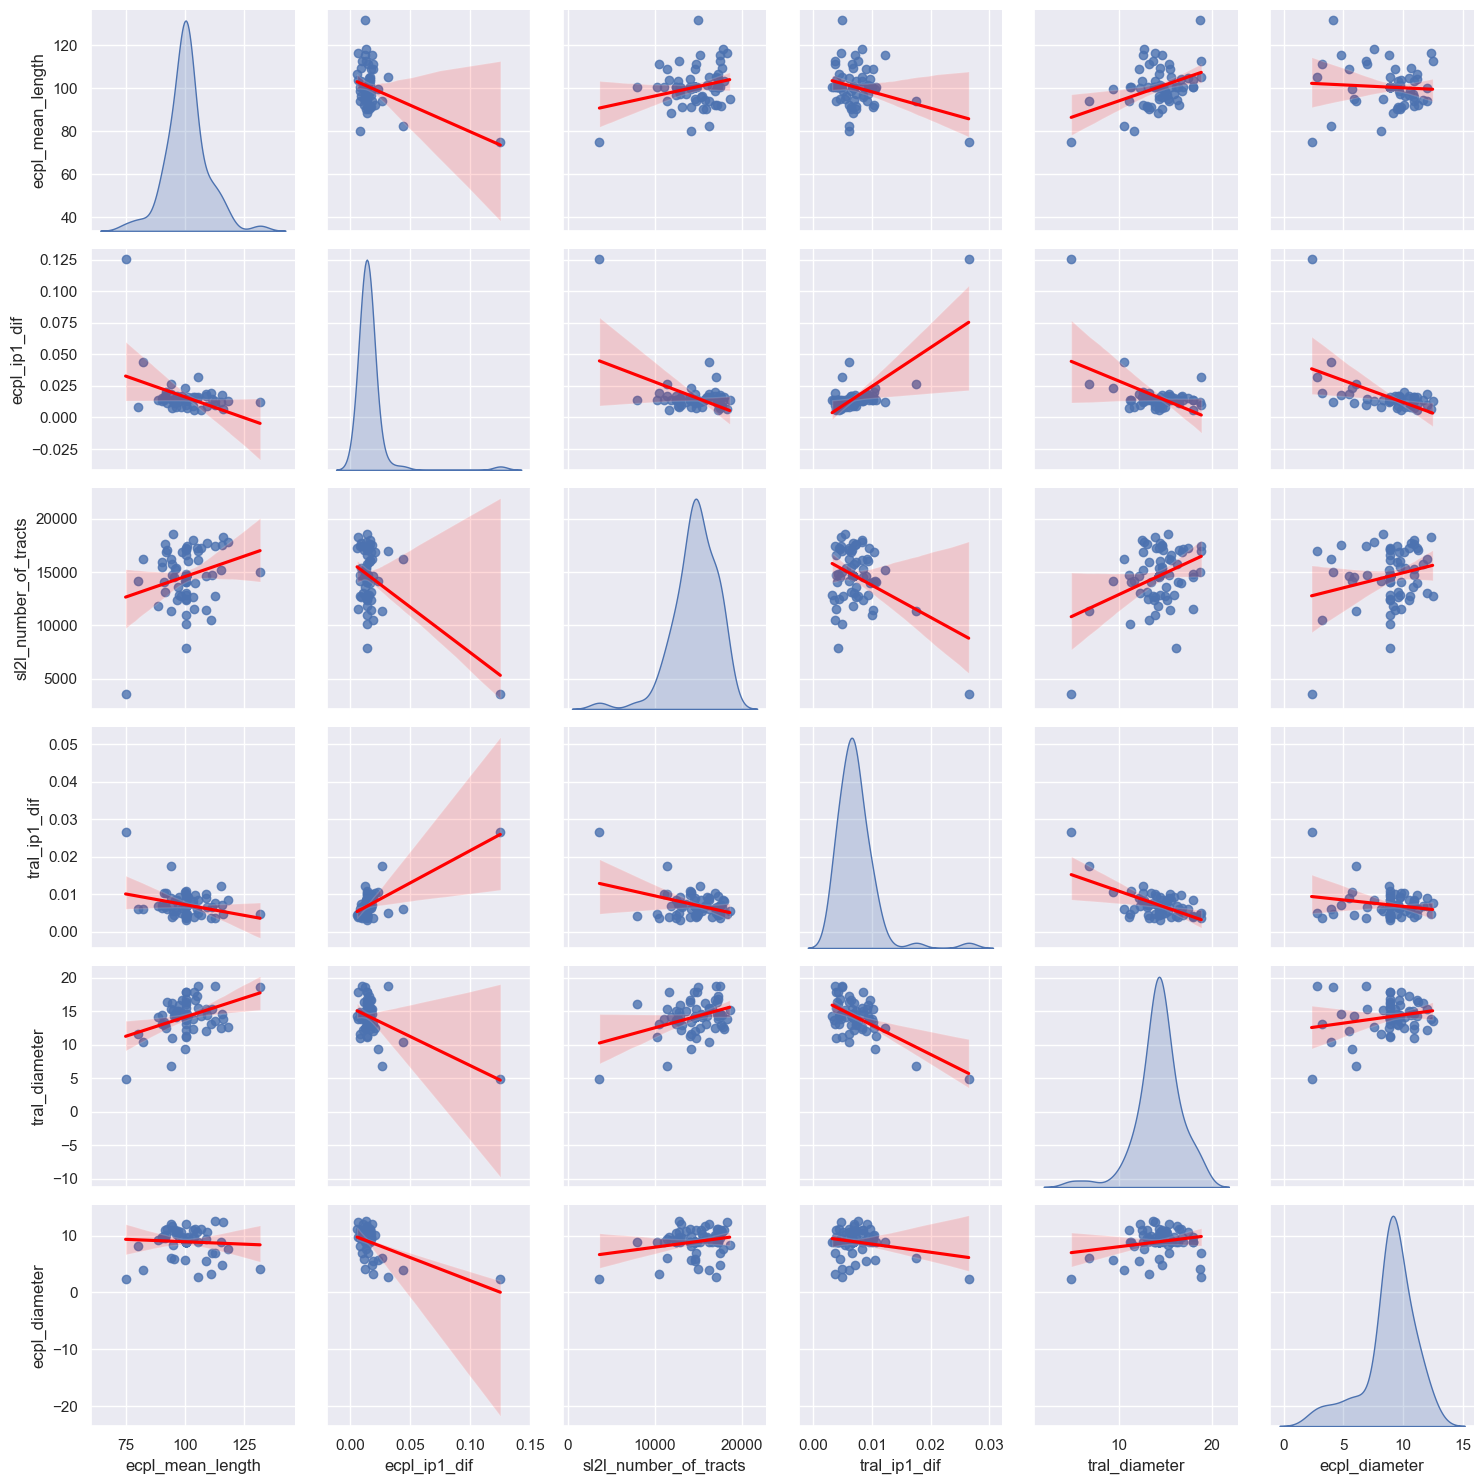

In [91]:
# Scatter plot:
labels=['ecpl_mean_length',
        'ecpl_ip1_dif', 
        'sl2l_number_of_tracts', 
        'tral_ip1_dif', 
        'tral_diameter', 
        'ecpl_diameter']
sns.set()
sns.pairplot(data1[labels],kind='reg', diag_kind='kde', plot_kws={'line_kws': {'color': 'red'}}, size = 2.5)
plt.tight_layout()
plt.show();

In [96]:
# Variable a predecir
target = 'label'

# Construcción de la matriz de features
X = df1.drop(['cod', 'label'], axis=1)

# Construcción del vector a predecir
y = df1[target].values

print('Dimensión de la matriz de features: {}'.format(X.shape))
print('Dimensión del vector a predecir: {}'.format(y.shape))
print('Vector a predecir: {}'.format(y))

Dimensión de la matriz de features: (75, 56)
Dimensión del vector a predecir: (75,)
Vector a predecir: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0]


In [98]:
# Solo por esta vez para a fijar la semilla de numeros aleatorios
# para que se separe siempre igual cada vez que corramos esta notebook 
random_seed = 123475

# Creacion de las matrices de entrenamiento y testeo. Aca fijamos la semilla para que siempre separe igual
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state = random_seed)

print('Dimensión de la matriz de features para entrenamiento: {}'.format(X_train.shape))
print('Dimensión de la matriz de features para testeo: {}'.format(X_test.shape))

Dimensión de la matriz de features para entrenamiento: (67, 56)
Dimensión de la matriz de features para testeo: (8, 56)


In [99]:
from pyod.models.knn import KNN
import pandas as pd

clf = KNN(contamination=0.18)
clf.fit(X_train)
y_pred = clf.predict(X_train)
X_train[y_pred == 1]

,ccbd_diameter,ccbd_mean_length,ccbd_number_of_tracts,ccbd_volume,ecpl_diameter,ecpl_mean_length,ecpl_number_of_tracts,ecpl_volume,ifol_diameter,ifol_mean_length,...,ifol_ip1_dif,ifol_ip2_norm,sl2l_ip1_dif,sl2l_ip2_norm,tral_ip1_dif,tral_ip2_norm,ufsl_ip1_dif,ufsl_ip2_norm,ufsr_ip1_dif,ufsr_ip2_norm
4,24.6510,131.7290,44224.0,62869.5,8.893479,100.580235,2936.541667,6774.582292,8.30575,173.132,...,0.021328,1.964517,0.007364,2.633665,0.008536,2.677147,0.011457,2.678544,0.008610,3.247105
52,23.9494,122.7600,27313.0,55301.6,2.347730,74.876500,17.000000,324.140000,13.45150,173.312,...,0.009921,2.065538,0.008864,2.979208,0.026493,2.928306,0.011098,3.058008,0.010129,3.169187
56,29.2207,133.1420,54767.0,89286.4,6.096250,94.006500,974.000000,2743.930000,16.42550,172.575,...,0.007690,1.885884,0.006192,2.586350,0.017543,2.554166,0.007570,3.350225,0.007947,3.773341
2,26.0740,109.9450,39403.0,58705.6,8.893479,100.580235,2936.541667,6774.582292,7.88520,145.187,...,0.009230,2.040639,0.004730,2.642847,0.004208,2.376092,0.008046,2.881791,0.006489,2.312317
14,19.1773,70.1557,5955.0,20264.1,8.893479,100.580235,2936.541667,6774.582292,4.95215,153.595,...,0.007203,2.221678,0.003417,2.739168,0.004431,2.789408,0.002873,4.823273,0.004018,3.196856
7,28.7169,116.5820,44070.0,75509.0,9.342750,109.119000,3732.000000,7480.680000,9.38168,157.089,...,0.013850,2.010736,0.009444,2.584304,0.010113,2.649824,0.014103,2.751535,0.016705,2.783633
45,21.7462,114.1520,26597.0,42397.7,3.190390,111.228000,105.000000,889.182000,15.77580,158.299,...,0.003295,2.199381,0.004872,2.649128,0.003710,2.626544,0.007385,3.349951,0.007909,3.220218
34,31.0910,125.1380,58651.0,95005.4,10.544900,105.034000,4446.000000,9172.870000,19.63540,178.651,...,0.008064,2.116938,0.008822,2.894584,0.006136,2.748840,0.008198,3.013775,0.009043,2.880417
41,32.3603,127.2020,60853.0,104619.0,6.869230,112.619000,1030.000000,4173.670000,19.03620,173.583,...,0.003446,2.205430,0.004727,2.492675,0.003652,2.820540,0.004044,3.437152,0.005832,2.858205
51,28.9399,124.6530,49343.0,81994.7,8.932960,105.470000,2388.000000,6610.110000,14.18790,148.949,...,0.006625,2.086777,0.005366,2.746744,0.008327,2.672617,0.011621,5.505923,0.010482,5.036197


In [100]:
# borro los outliers
indicador = X_train[y_pred == 1].index
X_train.drop(indicador, axis=0, inplace=True)

In [101]:
print('Dimensiones de la matriz de features: {}'.format(X_train.shape))

Dimensiones de la matriz de features: (55, 56)


In [102]:
y_train = np.delete(y_train, indicador)

In [103]:
y_train.shape

(55,)

In [104]:

std_scale = StandardScaler() # Creamos el estandarizador para usarlo posteriormente

# Ajustamos el estandarizador
std_scale.fit(X_test)
std_scale.fit(X_train)

# Aplicamos el estandarizador y obtenemos la matriz de features escaleados
X_test_scaled = std_scale.transform(X_test)
X_scaled = std_scale.transform(X_train)

In [118]:
componentes = 20

In [119]:
# Busco una cantidad de componentes que me expliquen el 91% de la varianza y 
# usar descomposición de valor único (SVD) para calcular los vectores propios
pca = PCA(n_components=componentes, svd_solver='full')
# Ajustamos el modelo a los datos escaleados
pca.fit(X_scaled)

# Obtenemos la descripción de los datos en el espacio de componentes principales
X_pca = pca.transform(X_scaled)
X_test_scaled_pca = pca.transform(X_test_scaled)

print('Dimensiones de la matriz en componentes principales: {}'.format(X_pca.shape))
print(X_scaled.shape, X_pca.shape)

Dimensiones de la matriz en componentes principales: (55, 20)
(55, 56) (55, 20)


Text(0.5, 0, 'Cantidad de componentes principales')

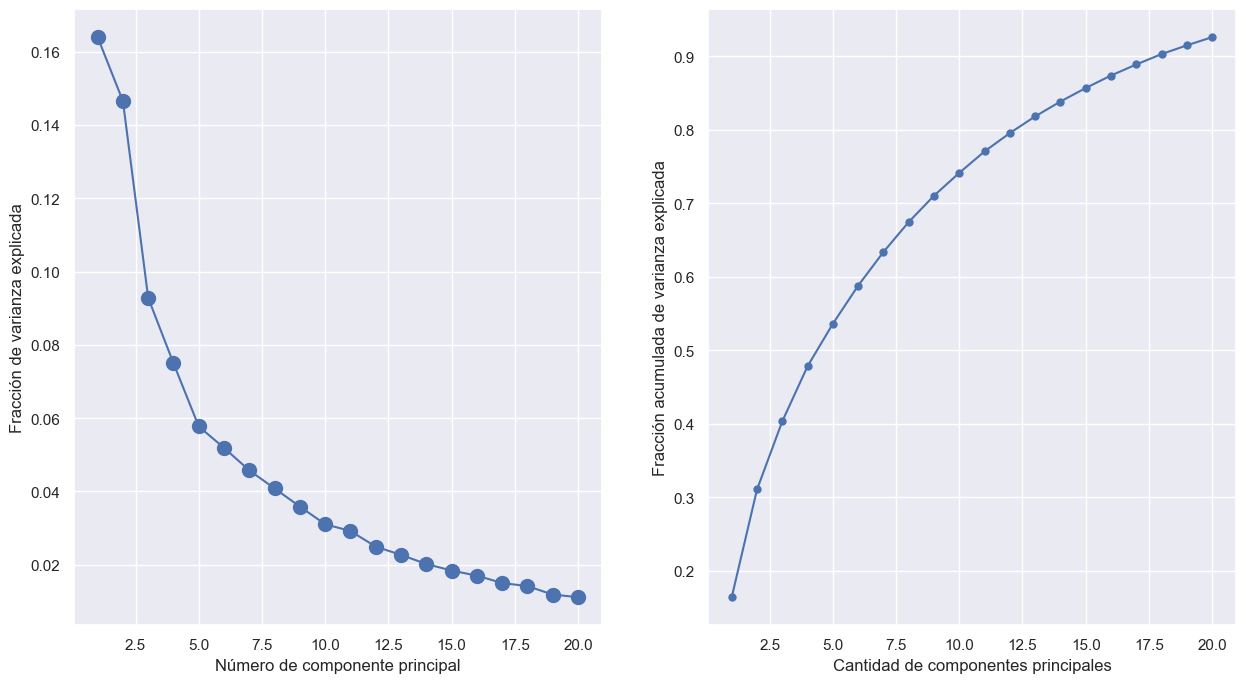

In [120]:

# con .explained_variance_ratio_ vemos la fracción de información que aporta cada componente
evr = pca.explained_variance_ratio_

# Graficamos la fracción de varianza que aporta cada componente
# y la información acumulada
fig, ax = plt.subplots(1, 2, figsize = (15, 8))

ax[0].plot(range(1, len(evr) + 1), evr, '.-', markersize = 20)
ax[0].set_ylabel('Fracción de varianza explicada')
ax[0].set_xlabel('Número de componente principal')

# Calculamos el acumulado con la función cumsum de numpy 
varianza_acumulada = np.cumsum(evr)

ax[1].plot(range(1, len(evr) + 1), varianza_acumulada, '.-', markersize = 10)
ax[1].set_ylabel('Fracción acumulada de varianza explicada')
ax[1].set_xlabel('Cantidad de componentes principales')

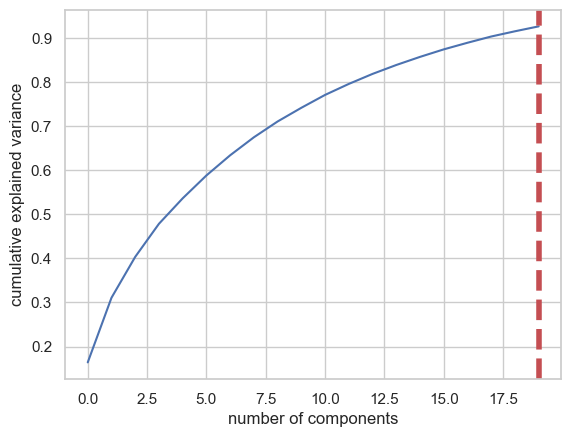

None

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.164007,0.164007
1,0.310557,0.146550
2,0.403385,0.092828
3,0.478375,0.074990
4,0.536113,0.057738
5,0.588009,0.051895
6,0.633755,0.045746
7,0.674583,0.040828
8,0.710448,0.035865
9,0.741497,0.031049


In [125]:
pca_test = PCA(n_components=componentes, svd_solver='full')
pca_test.fit(X_scaled)
X_train_scaled_pca = pca.transform(X_scaled)
sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axvline(linewidth=4, color='r', linestyle = '--', x=19, ymin=0, ymax=1)
display(plt.show())
evr = pca_test.explained_variance_ratio_
cvr = np.cumsum(pca_test.explained_variance_ratio_)
pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.head(20))

In [134]:
# obtenemos los features en el espacio de componentes principales
features = list(df1.drop(['cod', 'label'], axis=1).columns)
# Agregamos la información de los componentes principales a un dataframe
dfcol = pd.DataFrame(pca.components_, columns=features)

In [126]:
rfc = RandomForestClassifier()
rfc.fit(X_train_scaled_pca, y_train)

RandomForestClassifier()

In [127]:
print(classification_report(y_true=y_test,y_pred=rfc.predict(X_test_scaled_pca)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.86      0.86      0.86         7

    accuracy                           0.75         8
   macro avg       0.43      0.43      0.43         8
weighted avg       0.75      0.75      0.75         8



In [129]:
def balanced_accuracy(cm): # funcion para calcular la "balanced accuracy"
  sensibilidad = cm[1,1]/(cm[1,1]+cm[0,1])
  especificidad = cm[0,0]/(cm[1,0]+cm[0,0])
  return [sensibilidad, especificidad, (sensibilidad + especificidad)/2]

In [130]:
cm = confusion_matrix(y_test, rfc.predict(X_test_scaled_pca)) 
metricas = balanced_accuracy(cm)
print('Matriz de confusion del modelo es:')
print(cm)
print('Sensibilidad del modelo es de: {}'.format(round(metricas[0],4)))  
print('Especificidad del modelo es de: {}'.format(round(metricas[1],4)))  
print('BA del modelo es de: {}'.format(round(metricas[2],4))) 

Matriz de confusion del modelo es:
[[0 1]
 [1 6]]
Sensibilidad del modelo es de: 0.8571
Especificidad del modelo es de: 0.0
BA del modelo es de: 0.4286


In [131]:
## Corremos el modelo con cross validation
rfc_cv_score = cross_val_score(rfc, X, y, cv=10, scoring='roc_auc')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.9533333333333334


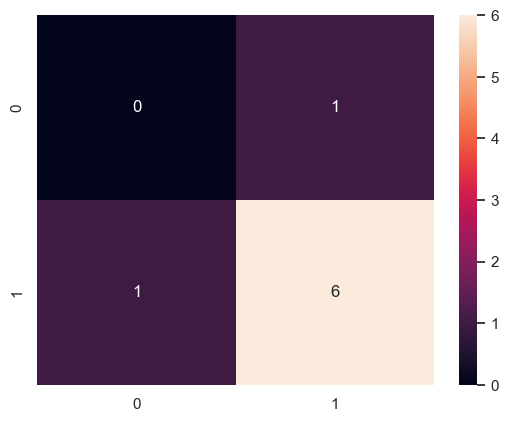

In [132]:
cf_matrix = confusion_matrix(y_test, rfc.predict(X_test_scaled_pca))
sns.heatmap(cf_matrix, annot=True);

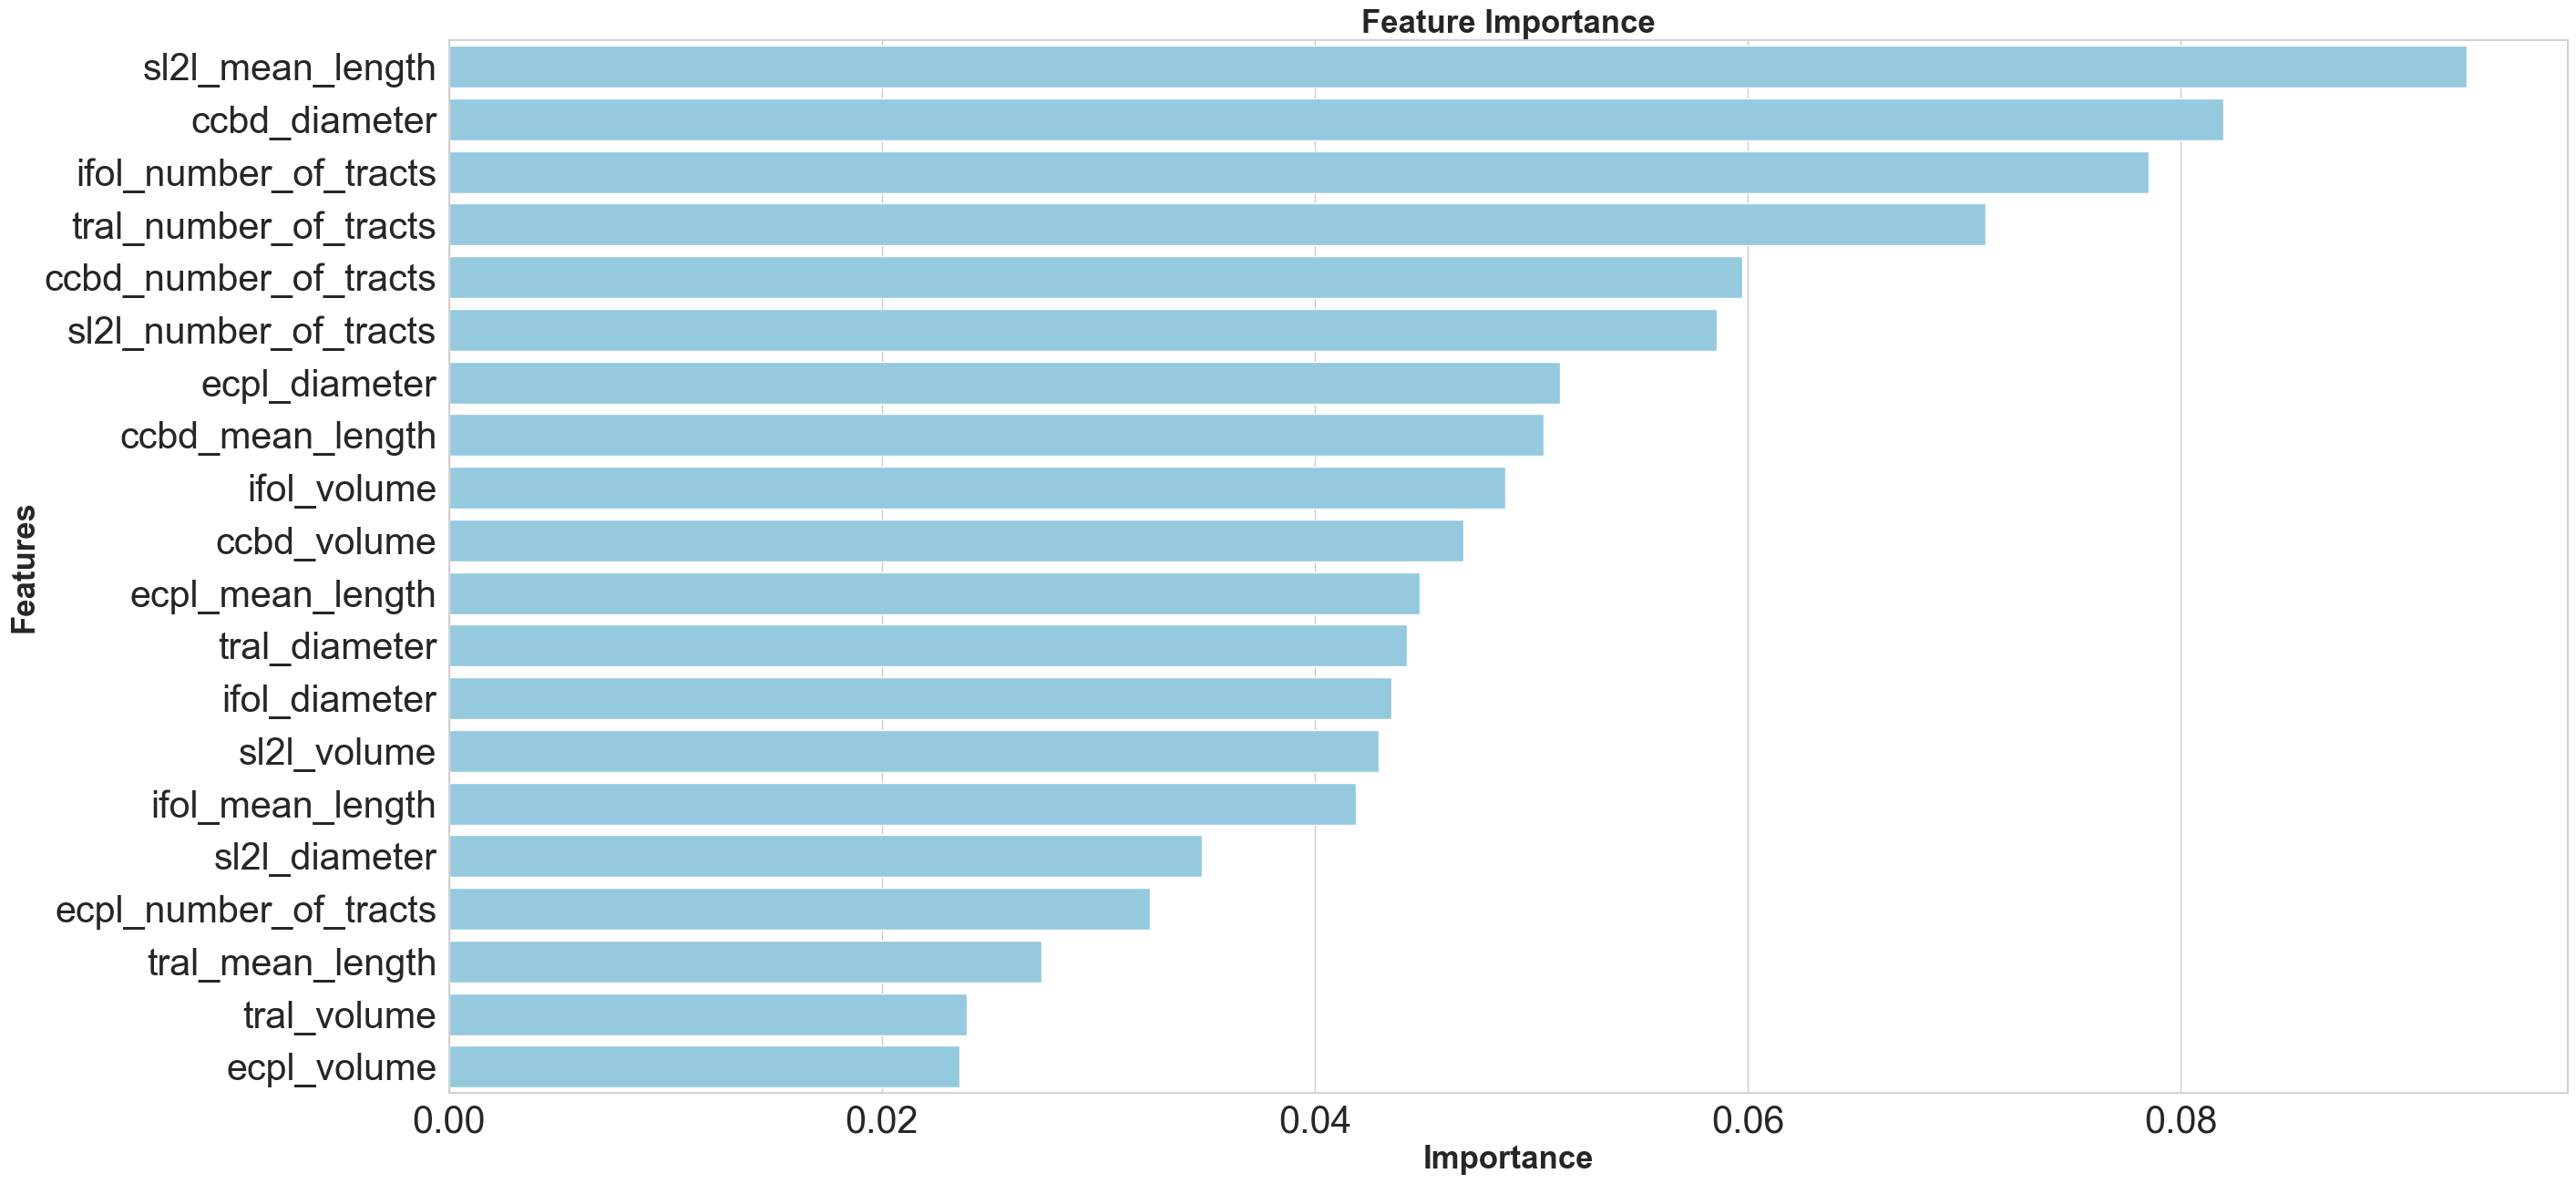

None

,Features,Gini-Importance
0,sl2l_mean_length,0.093198
1,ccbd_diameter,0.081965
2,ifol_number_of_tracts,0.078504
3,tral_number_of_tracts,0.070981
4,ccbd_number_of_tracts,0.059722
5,sl2l_number_of_tracts,0.058554
6,ecpl_diameter,0.051307
7,ccbd_mean_length,0.050573
8,ifol_volume,0.048817
9,ccbd_volume,0.046853


In [136]:
feats = {}
for feature, importance in zip(dfcol.columns, rfc.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 2.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Importance', fontsize=25, weight = 'bold')
plt.ylabel('Features', fontsize=25, weight = 'bold')
plt.title('Feature Importance', fontsize=25, weight = 'bold')
display(plt.show())
display(importances)

In [142]:
df1.columns

1